# Họ và Tên: Nguyễn Huỳnh Gia Phát
# MSSV: 2174802010902

### Câu 1 (2 điểm): Cho một ảnh bất kỳ (tên ảnh do sinh viên tự đặt, ví dụ: `my_image.jpg`) và thực hiện các yêu cầu sau:

* Viết chương trình sử dụng Bilateral filter để làm mịn ảnh. (0.5 điểm)  
* Viết chương trình sử dụng Canny Edge Detection để xác định biên của hình ảnh. (0.5 điểm)  
* Đổi màu ảnh bằng cách hoán đổi kênh màu theo thứ tự (ví dụ: BGR → BRG) và lưu thành tên dạng `[ten_anh]_swapped.jpg`. (0.5 điểm)  
* Chuyển ảnh sang không gian màu YCrCb và tách riêng 3 kênh Y, Cr, Cb, lưu thành ảnh grayscale tương ứng (`[ten_anh]_Y.jpg`, `[ten_anh]_Cr.jpg`, `[ten_anh]_Cb.jpg`). (0.5 điểm)


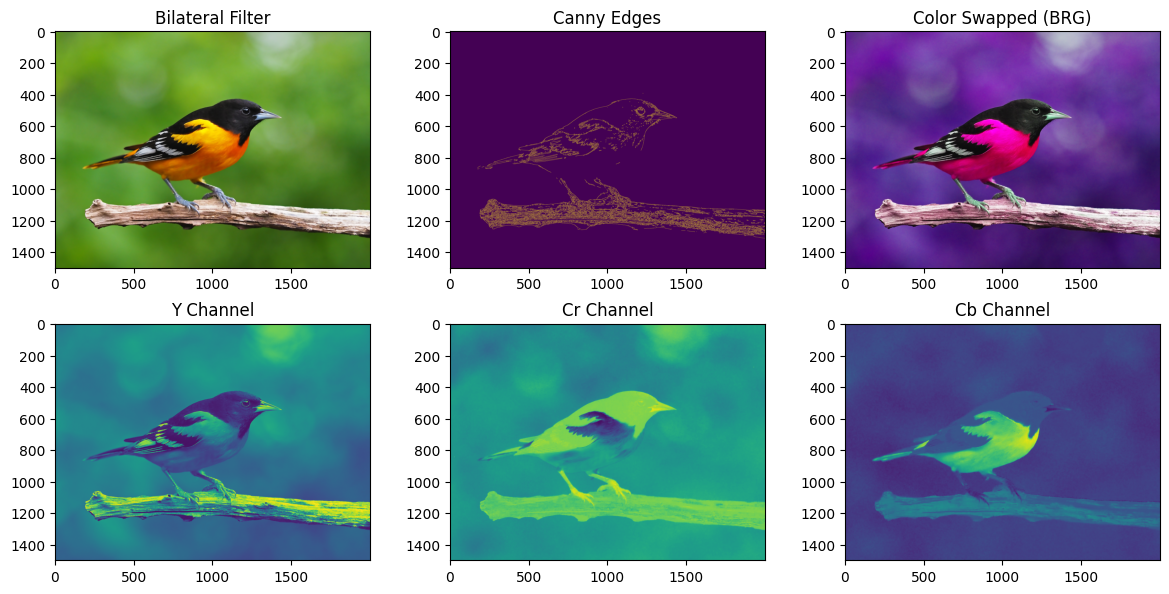

In [1]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
from skimage import feature
import matplotlib.pylab as plt
import colorsys
import cv2

a = iio.imread('bird.jpg').astype(np.uint8)

# Bilateral Filter 
bilateral = cv2.bilateralFilter(a, d=9, sigmaColor=75, sigmaSpace=75)
iio.imsave('bird1.jpg', bilateral)

# Canny Edge Detection 
gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY) if len(a.shape) == 3 else a
canny = cv2.Canny(gray, threshold1=100, threshold2=200)
iio.imsave('bird2.jpg', canny)

# Đổi kênh màu BGR → BRG
if len(a.shape) == 2:
    a_color = np.stack((a, a, a), axis=-1)
else:
    a_color = a

# Hoán đổi BGR -> BRG
swapped = a_color[:, :, [0, 2, 1]]
iio.imsave('bird3_swapped.jpg', swapped)

# Chuyển sang YCrCb
a_ycrcb = cv2.cvtColor(a_color, cv2.COLOR_BGR2YCrCb)
y_channel = a_ycrcb[:, :, 0]
cr_channel = a_ycrcb[:, :, 1]
cb_channel = a_ycrcb[:, :, 2]
iio.imsave('bird_Y.jpg', y_channel)
iio.imsave('bird_Cr.jpg', cr_channel)
iio.imsave('bird_Cb.jpg', cb_channel)

# Kết quả
plt.figure(figsize=(12, 6))
plt.subplot(231)
plt.imshow(bilateral)
plt.title("Bilateral Filter")

plt.subplot(232)
plt.imshow(canny)
plt.title("Canny Edges")

plt.subplot(233)
plt.imshow(swapped)
plt.title("Color Swapped (BRG)")

plt.subplot(234)
plt.imshow(y_channel)
plt.title("Y Channel")

plt.subplot(235)
plt.imshow(cr_channel)
plt.title("Cr Channel")

plt.subplot(236)
plt.imshow(cb_channel)
plt.title("Cb Channel")

plt.tight_layout()
plt.show()

### Câu 2 (4 điểm) Viết một chương trình Python sử dụng OpenCV để tạo menu tương tác cho phép người dùng chọn các kỹ thuật biến đổi hình học và xử lý ảnh nâng cao từ một danh sách, áp dụng đồng thời cho nhiều ảnh.

### Yêu cầu:

1. Menu gồm:  
* Phóng to ảnh (Zoom bằng resize) (0.5 điểm)  
* Xoay ảnh (góc ngẫu nhiên từ 0–360 độ) (0.5 điểm)  
* Lật ảnh ngang (0.5 điểm)  
* Lật ảnh dọc (0.5 điểm)  
* Cắt ảnh (crop ngẫu nhiên vùng giữa ảnh) (0.5 điểm)  
* Thêm viền (padding màu ngẫu nhiên) (0.5 điểm)

2. Chương trình xử lý đồng thời 3 ảnh bất kỳ do sinh viên tự chọn (có thể chọn bằng đường dẫn file hoặc nhập tên ảnh tùy ý). (0.5 điểm)

3. Phím tương ứng để kích hoạt các phương pháp xử lý:  
* Z: Zoom  
* T: Rotate  
* H: Horizontal Flip  
* V: Vertical Flip  
* C: Crop  
* P: Padding (0.5 điểm)

4. Lưu file kết quả với định dạng: `result_[phương pháp]_[tên ảnh gốc].jpg`  
   Ví dụ: `result_crop_cat.jpg`, `result_rotate_image1.jpg` (0.5 điểm)


In [ ]:
import cv2
import numpy as np
import random
import os

image_names = ["bird.jpg", "image1.jpg", "cat.jpg"]
# Tạo thư mục
output_dir = "results"
os.makedirs(output_dir, exist_ok=True)

def zoom_image(img):
    zoomed = cv2.resize(img, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)
    return zoomed

def rotate_image(img):
    angle = random.randint(0, 360)
    h, w = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(img, M, (w, h))
    return rotated

def flip_horizontal(img):
    return cv2.flip(img, 1)

def flip_vertical(img):
    return cv2.flip(img, 0)

def crop_image(img):
    h, w = img.shape[:2]
    top = h // 4
    bottom = h - h // 4
    left = w // 4
    right = w - w // 4
    cropped = img[top:bottom, left:right]
    return cropped

def padding_image(img):
    top = bottom = random.randint(20, 50)
    left = right = random.randint(20, 50)
    color = [random.randint(0, 255) for _ in range(3)]
    padded = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
    return padded

def save_and_show(img, method_name, original_name):
    out_name = f"result_{method_name}_{original_name}"
    out_path = os.path.join(output_dir, out_name)
    cv2.imwrite(out_path, img)
    print(f"Đã lưu: {out_path}")
    cv2.imshow(f"{method_name.upper()} - {original_name}", img)

def process_all_images(method_key):
    for img_name in image_names:
        img = cv2.imread(img_name)
        if img is None:
            print(f"Không thể đọc ảnh: {img_name}")
            continue

        if method_key == 'Z':
            result = zoom_image(img)
            save_and_show(result, "zoom", img_name)
        elif method_key == 'T':
            result = rotate_image(img)
            save_and_show(result, "rotate", img_name)
            result = flip_horizontal(img)
            save_and_show(result, "horizontal", img_name)
        elif method_key == 'V':
            result = flip_vertical(img)
            save_and_show(result, "vertical", img_name)
        elif method_key == 'C':
            result = crop_image(img)
            save_and_show(result, "crop", img_name)
        elif method_key == 'P':
            result = padding_image(img)
            save_and_show(result, "padding", img_name)
while True:
    print("\n=== MENU XỬ LÝ ẢNH ===")
    print("Z: Phóng to ảnh")
    print("T: Xoay ảnh (góc ngẫu nhiên)")
    print("H: Lật ảnh ngang")
    print("V: Lật ảnh dọc")
    print("C: Cắt ảnh giữa")
    print("P: Thêm viền màu ngẫu nhiên")
    print("Q: Thoát chương trình")

    key = input("Nhấn phím tương ứng để xử lý (Z/T/H/V/C/P): ").upper()

    if key in ['Z', 'T', 'H', 'V', 'C', 'P']:
        process_all_images(key)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    elif key == 'Q':
        print("Thoát chương trình.")
        break
    else:
        print("Phím không hợp lệ, vui lòng chọn lại.")



=== MENU XỬ LÝ ẢNH ===
Z: Phóng to ảnh
T: Xoay ảnh (góc ngẫu nhiên)
H: Lật ảnh ngang
V: Lật ảnh dọc
C: Cắt ảnh giữa
P: Thêm viền màu ngẫu nhiên
Q: Thoát chương trình
Đã lưu: results\result_zoom_bird.jpg
Đã lưu: results\result_zoom_image1.jpg
Đã lưu: results\result_zoom_cat.jpg


### Câu 3 (4 điểm) Viết một chương trình Python để xử lý 3 ảnh bất kỳ do sinh viên tự chọn.

* Thêm viền đen 20 pixel cho ảnh đầu tiên. (0.5 điểm)  
* Xoay ảnh thứ hai 45 độ và phóng to 1.5 lần. (0.5 điểm)  
* Tăng kích thước ảnh thứ ba lên 4 lần, sau đó áp dụng Bilateral Filter với tham số tùy chọn. (1.5 điểm)  
* Thay đổi độ sáng và độ tương phản ảnh thứ ba theo công thức:

$$
I_{out}(x, y) = \alpha \cdot I_{in}(x, y) + \beta
$$

Trong đó:  

$$
\alpha \in [0.6, 2.0], \quad \beta \in [-60, 60]
$$

Giá trị đầu ra cần được giới hạn trong khoảng [0, 255] bằng công thức:

$$
I_{out}(x, y) = \text{clip}(I_{out}(x, y), 0, 255)
$$


In [ ]:
import cv2
import numpy as np
import os

image_names = ["bird.jpg", "image1.jpg", "cat.jpg"]
output_dir = "result_cau3"
os.makedirs(output_dir, exist_ok=True)

# Ảnh 1 – Thêm viền đen 20 pixel
def process_image1(img, name):
    padded = cv2.copyMakeBorder(img, 20, 20, 20, 20, cv2.BORDER_CONSTANT, value=[0, 0, 0])
    out_path = os.path.join(output_dir, f"result_padding_{name}")
    cv2.imwrite(out_path, padded)
    print(f"Đã xử lý ảnh 1: {out_path}")

# Ảnh 2 – Xoay 45 độ và phóng to 1.5 lần
def process_image2(img, name):
    img_zoom = cv2.resize(img, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)
    h, w = img_zoom.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, 45, 1.0)
    rotated = cv2.warpAffine(img_zoom, M, (w, h))
    out_path = os.path.join(output_dir, f"result_rotate_zoom_{name}")
    cv2.imwrite(out_path, rotated)
    print(f"Đã xử lý ảnh 2: {out_path}")

# Ảnh 3 – Tăng 4 lần, lọc Bilateral, thay đổi độ sáng và tương phản
def process_image3(img, name):
    # Resize 4 lần
    img_large = cv2.resize(img, None, fx=4, fy=4, interpolation=cv2.INTER_LINEAR)
    # Bilateral filter 
    img_filtered = cv2.bilateralFilter(img_large, d=9, sigmaColor=75, sigmaSpace=75)
    # Thay đổi độ sáng - tương phản
    alpha = 1.5  
    beta = 30   
    adjusted = np.clip(alpha * img_filtered + beta, 0, 255).astype(np.uint8)
    out_path = os.path.join(output_dir, f"result_bilateral_adjust_{name}")
    cv2.imwrite(out_path, adjusted)
    print(f"Đã xử lý ảnh 3: {out_path}")

# Đọc và xử lý 
for idx, img_name in enumerate(image_names):
    img = cv2.imread(img_name)
    if img is None:
        print(f"Không thể đọc ảnh: {img_name}")
        continue
    if idx == 0:
        process_image1(img, img_name)
    elif idx == 1:
        process_image2(img, img_name)
    elif idx == 2:
        process_image3(img, img_name)




Đã xử lý ảnh 1: result_cau3\result_padding_bird.jpg
Đã xử lý ảnh 2: result_cau3\result_rotate_zoom_image1.jpg
Đã xử lý ảnh 3: result_cau3\result_bilateral_adjust_cat.jpg

✅ Đã xử lý xong cả 3 ảnh cho Câu 3.


# Chúc các bạn thi may mắn và đạt điểm 10.